In [130]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [131]:
sports_data = []

dataset = {'train':  'C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train',
          'validation':  'C:/Users/mplan/Desktop/my_stuff/projects/100_sports/valid',
          'test':  'C:/Users/mplan/Desktop/my_stuff/projects/100_sports/test'}


for i in dataset.values():
    
    
    data = {"image_path": [] , "label": [] } #create an empty
    category = os.listdir(i)# whats inside in a list
    
    
    for folder in category:
        folder_path = i + '/' + str(folder)
        print(i)
        file_list = os.listdir(folder_path) # take all the images # from each folder
        
        for file in file_list:
            file_path = folder_path + '/' + str(file)
            data['image_path'].append(file_path)
            data['label'].append(folder)
    
    sports_data.append(data.copy())
    data.clear()
    
        
        
        
    
    

C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan/Desktop/my_stuff/projects/100_sports/train
C:/Users/mplan

## seperate in train test val 

In [132]:
train = pd.DataFrame(sports_data[0],index=range(len(sports_data[0]['image_path'])))
test = pd.DataFrame(sports_data[2],index=range(len(sports_data[2]['image_path'])))
val = pd.DataFrame(sports_data[1],index=range(len(sports_data[1]['image_path'])))

In [133]:
train.shape,test.shape,val.shape

((13493, 2), (500, 2), (500, 2))

##  class balance and visualization

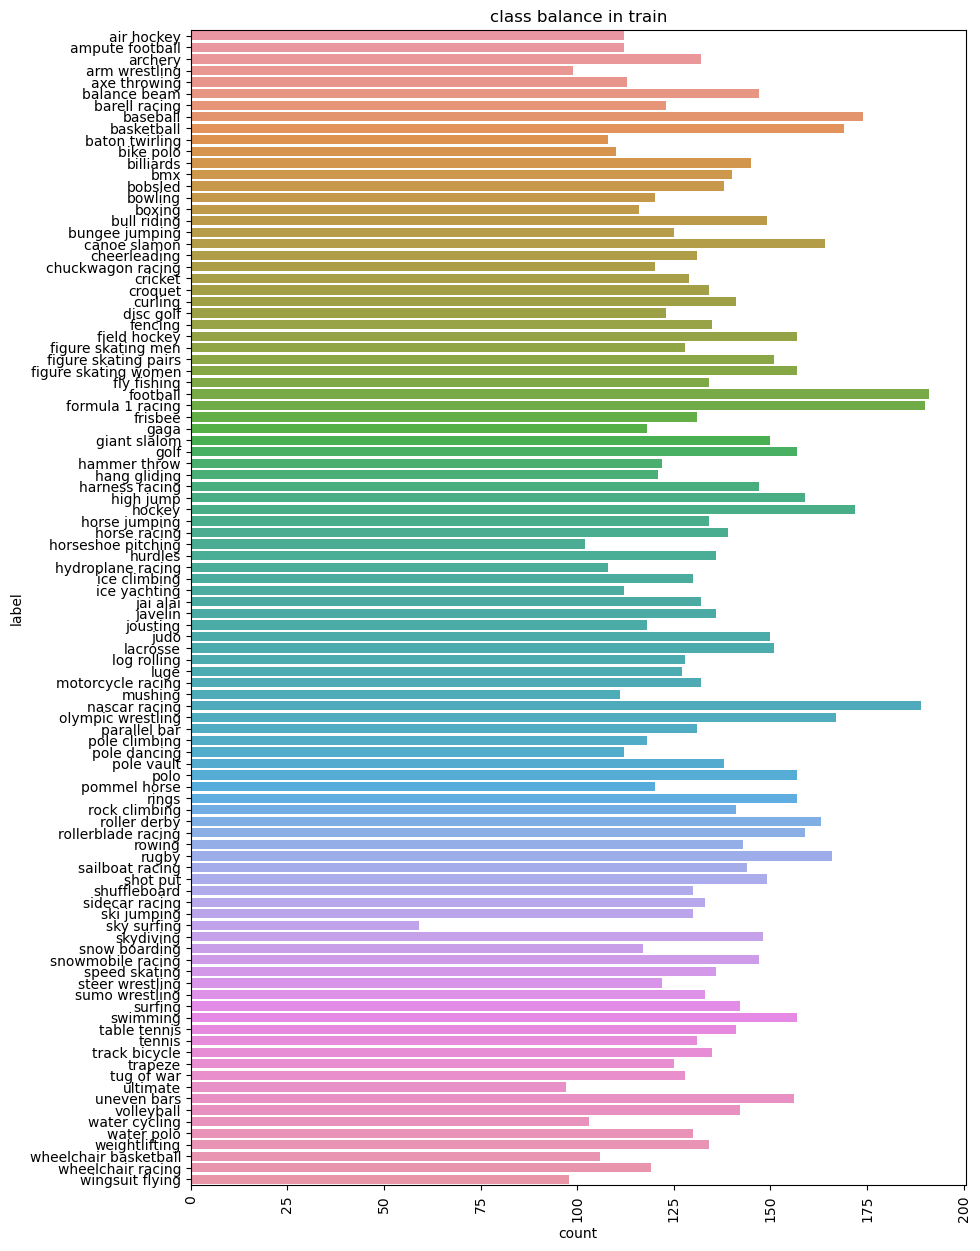

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,15))
sns.countplot(y = train['label'])
plt.title('class balance in train')
plt.xticks(rotation=90)
plt.show()

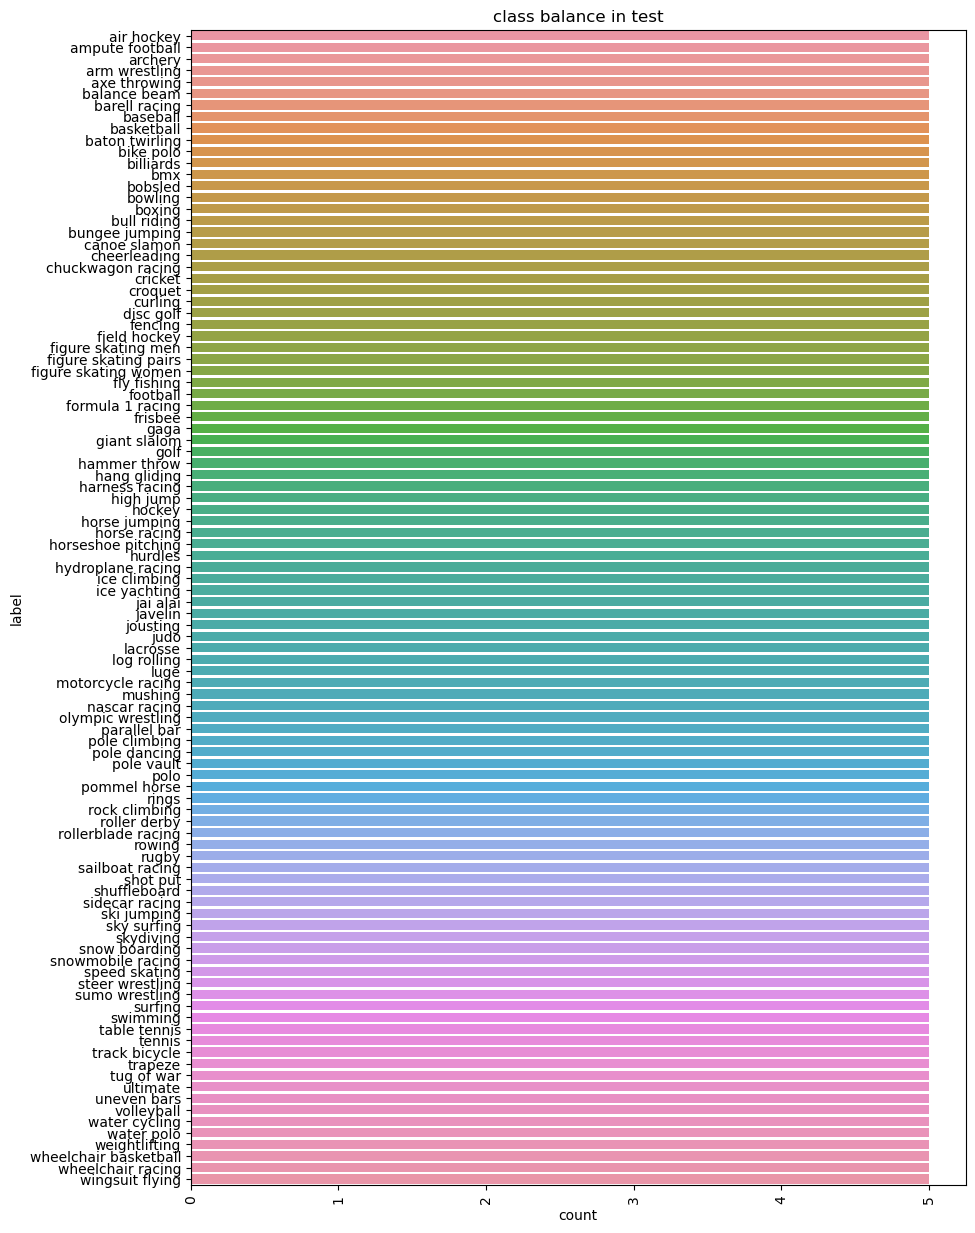

In [135]:
# test
plt.figure(figsize=(10,15))
sns.countplot(y = test['label'])
plt.title('class balance in test')
plt.xticks(rotation=90)
plt.show()

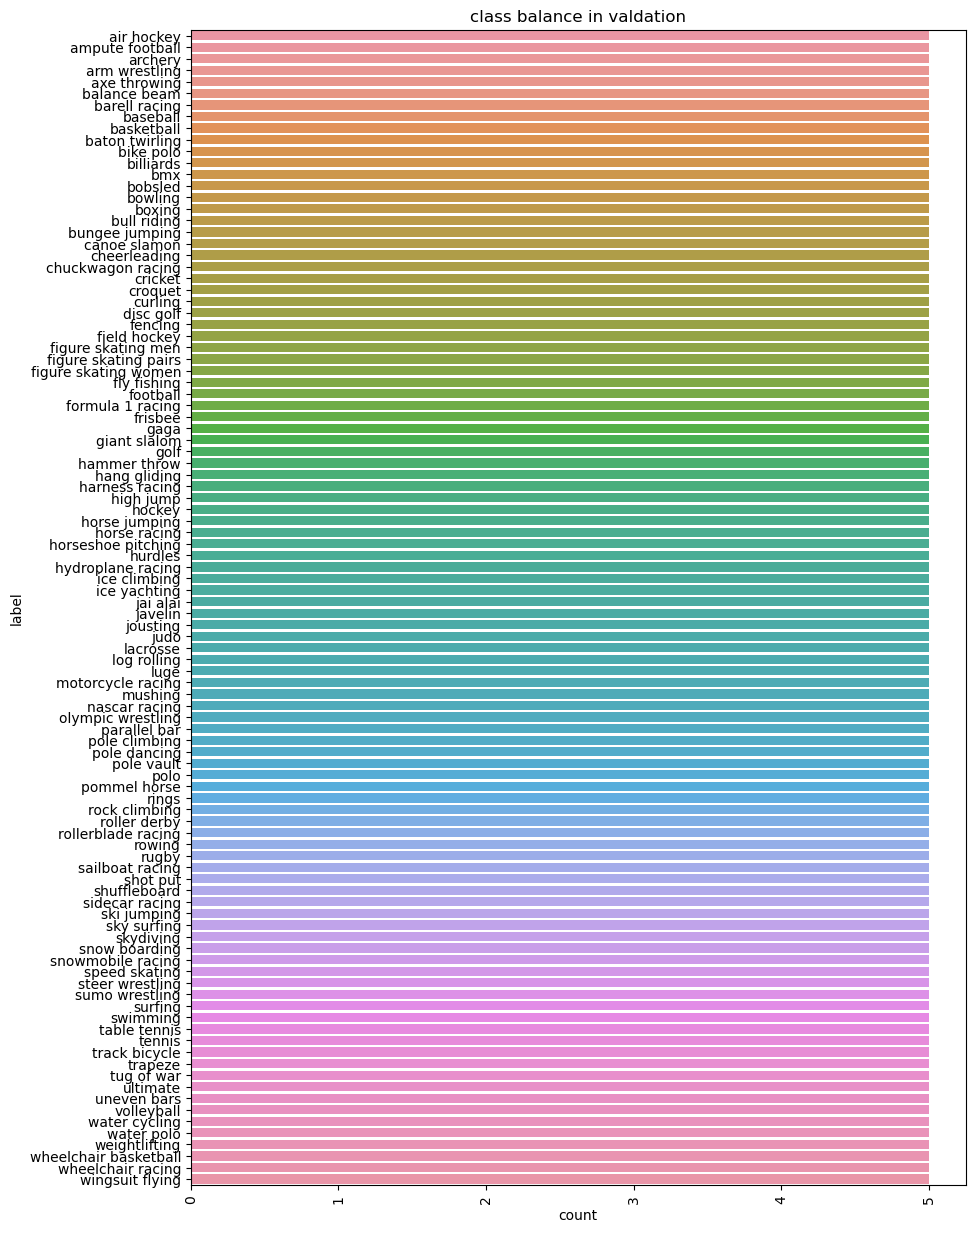

In [136]:
# val 
plt.figure(figsize=(10,15))
sns.countplot(y = val['label'])
plt.title('class balance in valdation')
plt.xticks(rotation=90)
plt.show()

## convert labels to numbers 

In [137]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

train['label_encoded'] = le.fit_transform(train['label'])
val['label_encoded'] = le.transform(val['label'])
test['label_encoded'] = le.transform(test['label'])

In [138]:
train.head(3),test.head(3),val.head(3)

(                                          image_path       label  \
 0  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 1  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 2  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 
    label_encoded  
 0              0  
 1              0  
 2              0  ,
                                           image_path       label  \
 0  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 1  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 2  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 
    label_encoded  
 0              0  
 1              0  
 2              0  ,
                                           image_path       label  \
 0  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 1  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 2  C:/Users/mplan/Desktop/my_stuff/projects/100_s...  air hockey   
 
    

In [139]:
train.shape

(13493, 3)

### view some images

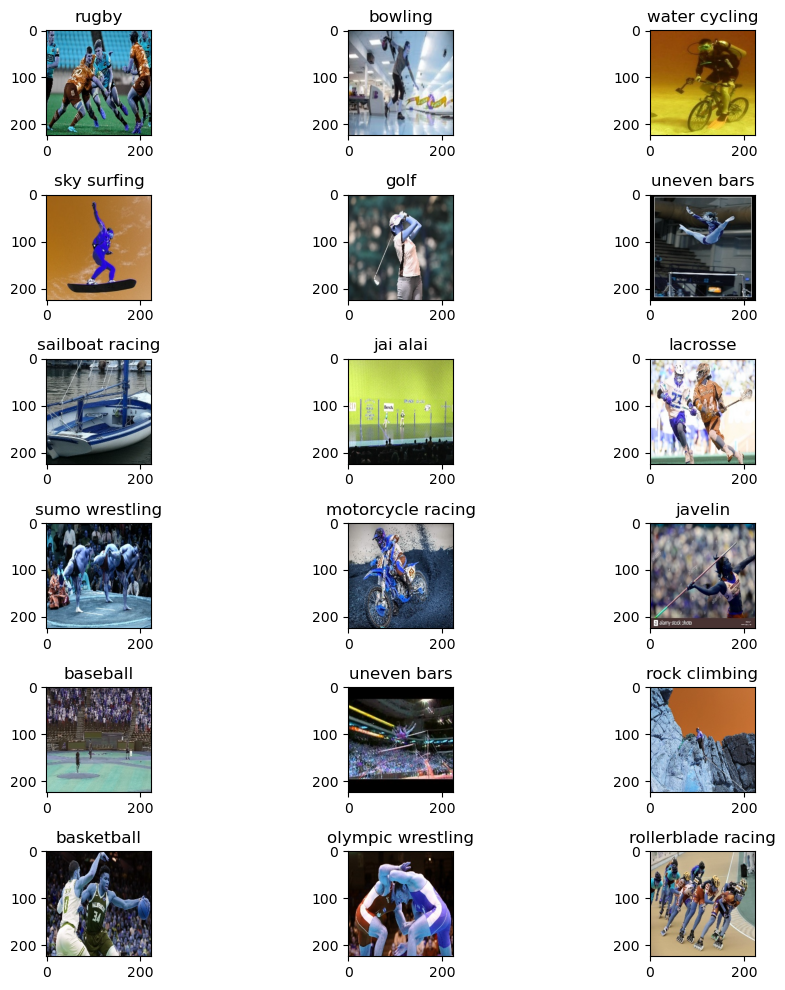

In [140]:
import random 
import cv2

picks = [random.randint(1,train.shape[0]) for i in range(18)]

viz_imgs = []
labels = []

for i in picks:
    x = train.loc[i,['image_path','label']]
    viz_imgs.append(x['image_path'])
    labels.append(x['label'])


plt.figure(figsize=(10,10))
for i in range(len(picks)):
    plt.subplot(6,3,i+1)
    x = cv2.imread(viz_imgs[i])
    plt.imshow(x)
    plt.title(labels[i])
plt.tight_layout()
plt.show()


## get the images via imagedatagenerator

In [141]:
img_size = (224,224)
b_size = 10


from keras.preprocessing.image import ImageDataGenerator as idg



pre_img = idg(tf.keras.applications.efficientnet.preprocess_input,
             rotation_range=0.1,
             width_shift_range=0.1,
             height_shift_range=0.1,
             shear_range=0.1,
             zoom_range=0.1,
             horizontal_flip=True)


train_images = pre_img.flow_from_dataframe(dataframe=train,
                                              x_col='image_path',
                                          y_col='label',
                                          target_size =img_size,
                                          color_mode='rgb',
                                          class_mode = 'categorical',
                                          batch_size=b_size,
                                          shuffle=True)

val_images = pre_img.flow_from_dataframe(dataframe=val,
                                              x_col='image_path',
                                          y_col='label',
                                          target_size =img_size,
                                          color_mode='rgb',
                                          class_mode = 'categorical',
                                          batch_size=b_size,
                                          shuffle=True)
test_images = pre_img.flow_from_dataframe(dataframe=test,
                                              x_col='image_path',
                                          y_col='label',
                                          target_size =img_size,
                                          color_mode='rgb',
                                          class_mode = 'categorical',
                                          batch_size=b_size,
                                          shuffle=False)

Found 13492 validated image filenames belonging to 100 classes.
Found 500 validated image filenames belonging to 100 classes.
Found 500 validated image filenames belonging to 100 classes.


C:\Users\mplan\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


## prepare the pretrained model EficientNet 

In [142]:
#load 

pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

In [143]:
### not trainable

for i,layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

In [144]:
### prepare the extra model part
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import * 


In [145]:
### final model


inputs = Input(shape = (224,224,3), name='inputLayer')


pretrain_out = pretrained_model(inputs, training = False)

x = Dense(350,activation='relu')(pretrain_out)

x = BatchNormalization()(x)

x = Dropout(0.25)(x)

x = Dense(100)(x)

outputs = Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) 

model = Model(inputs=inputs, outputs=outputs)

## model compile

In [146]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0005),
             loss = 'categorical_crossentropy',metrics=['accuracy'])

In [147]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense_7 (Dense)             (None, 350)               448350    
                                                                 
 batch_normalization_3 (Bat  (None, 350)               1400      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 350)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               3510

## create callbacks

In [148]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau,ModelCheckpoint



checkpoint = ModelCheckpoint(
    'weights.h5',
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch")

stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    start_from_epoch=5,
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=3
)

## train the model 

In [150]:
history = model.fit(train_images,steps_per_epoch=len(train_images),validation_data=val_images,
    validation_steps=len(val_images),
    epochs=50,callbacks=[reduce_lr,stop,checkpoint])

C:\Users\mplan\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50



1350/1350 [==============================] - 645s 463ms/step - loss: 1.3171 - accuracy: 0.6886 - val_loss: 0.8844 - val_accuracy: 0.7380 - lr: 0.0010
Epoch 2/50
1350/1350 [==============================] - 610s 452ms/step - loss: 0.6302 - accuracy: 0.8318 - val_loss: 0.6388 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 3/50
1350/1350 [==============================] - 620s 459ms/step - loss: 0.5436 - accuracy: 0.8515 - val_loss: 0.3204 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/50
1350/1350 [==============================] - 613s 454ms/step - loss: 0.4529 - accuracy: 0.8696 - val_loss: 0.3402 - val_accuracy: 0.9060 - lr: 0.0010
Epoch 5/50
1350/1350 [==============================] - 612s 453ms/step - loss: 0.4414 - accuracy: 0.8703 - val_loss: 0.3434 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 6/50
1350/1350 [==============================] - 612s 453ms/step - loss: 0.3875 - accuracy: 0.8808 - val_loss: 0.3578 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 7/50
1350/1350 [=======================

## load best weights

In [151]:
model.load_weights('weights.h5')

## lets see about the training

In [168]:
keys = list(history.history.keys())
history.history[keys[0]]

[1.3171076774597168,
 0.6302171945571899,
 0.5436398386955261,
 0.452936589717865,
 0.44137823581695557,
 0.3875299096107483,
 0.2992910146713257,
 0.26714202761650085,
 0.253364235162735,
 0.2520922124385834,
 0.2408941388130188,
 0.22011378407478333,
 0.21346881985664368,
 0.20723247528076172,
 0.20207546651363373,
 0.1880587488412857,
 0.18672890961170197,
 0.17599666118621826,
 0.17390578985214233]

In [167]:
keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

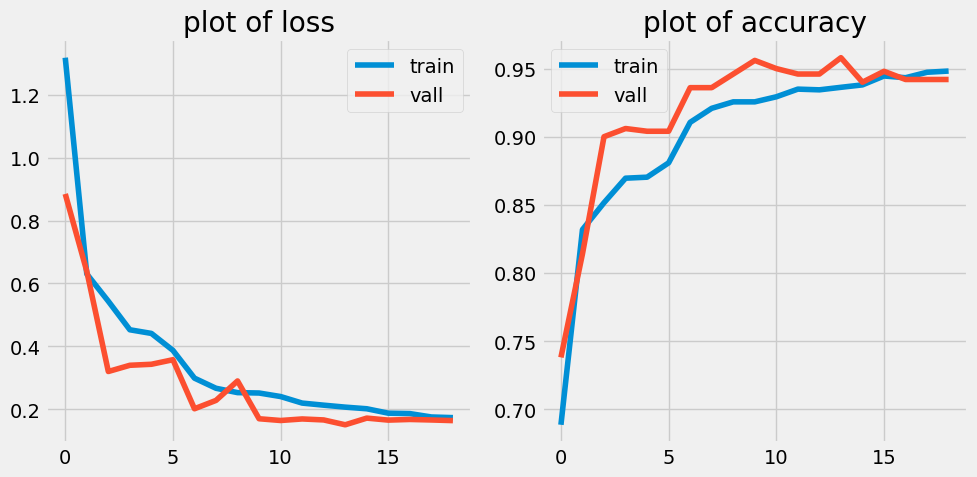

In [179]:
keys = list(history.history.keys())

plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(history.history[keys[i]],label='train')
    plt.plot(history.history[keys[i+2]],label='vall')
    if i in [0,2]:
                plt.title('plot of loss')
    else:
                plt.title('plot of accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

## as we can see it went prety well

## lets see the performance on the test data 

In [196]:
predicted = model.predict(test_images)
y_test = test['label_encoded'].values
predicted_index = [np.argmax(i) for i in predicted]

C:\Users\mplan\anaconda3\Lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


50/50 [==============================] - 17s 342ms/step


In [202]:
from sklearn.metrics import  accuracy_score, f1_score

In [208]:
print(f'accuracy score in test images = {accuracy_score(y_test,predicted_index)} %')
print(f"f1 score in test images = {f1_score(y_test,predicted_index,average='macro')}")

accuracy score in test images = 0.962 %
f1 score in test images = 0.9616818181818182


## lest see where the model make most of the mistakes

In [245]:
test_v = test[['label','label_encoded']].values
predicted_labels = []
for i in range(len(predicted_index)):
    if test_v[i][1] == predicted_index[i]:
        predicted_labels.append(test_v[i][0])

diferent = []
test_l = test['label'].values
for i in range(len(predicted_labels)):
    if predicted_labels[i] != test_l[i]:
        diferent.append([predicted_labels[i] , test_l[i]])

num_of_d = {}


for i in range(len(diferent)):
    if str(diferent[i]) not in num_of_d.keys():
        num_of_d[str(diferent[i])] = 0 
    else:
        num_of_d[str(diferent[i])] +=1
        

In [253]:
values = []
for key,value in num_of_d.items():
    values.append(value)
values = set(values)
mistake_count_bigger_than_75 = int(len(set(values))*75/100)


most_common_mistakes = []
for key,value in num_of_d.items():
    if value >= mistake_count_bigger_than_75:
        most_common_mistakes.append([key,value])
        
        
    



In [260]:
for  i in range(len(most_common_mistakes)):
    print(most_common_mistakes[i][0] ,' happened' ,most_common_mistakes[i][1] , ' times')

['gaga', 'frisbee']  happened 3  times
['giant slalom', 'gaga']  happened 3  times
['golf', 'giant slalom']  happened 3  times
['hammer throw', 'golf']  happened 3  times
['hang gliding', 'hammer throw']  happened 3  times
['harness racing', 'hang gliding']  happened 3  times
['high jump', 'harness racing']  happened 3  times
['hockey', 'high jump']  happened 3  times
['horse jumping', 'hockey']  happened 3  times
['horse racing', 'horse jumping']  happened 3  times
['horseshoe pitching', 'horse racing']  happened 3  times
['hurdles', 'horseshoe pitching']  happened 3  times
['ice climbing', 'hydroplane racing']  happened 3  times
['ice yachting', 'ice climbing']  happened 3  times
['judo', 'javelin']  happened 3  times
['lacrosse', 'jousting']  happened 3  times
['log rolling', 'judo']  happened 3  times
['luge', 'lacrosse']  happened 3  times
['motorcycle racing', 'log rolling']  happened 3  times
['mushing', 'luge']  happened 3  times
['shuffleboard', 'rugby']  happened 3  times
['s

## the overall performace of our model is excelent so we are going to save it for later use 

In [264]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
